# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import os
import glob
import pandas as pd
cwd = os.getcwd()
os.chdir(cwd) #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [22]:
extension = 'csv'
#[Write your Code Here]
files = glob.glob(cwd + '/*.csv')
li = []

# loop through list of files and read each one into a dataframe and append to list
for f in files:
    # read in csv
    temp_df = pd.read_csv(f)
    # append df to list
    li.append(temp_df)
    print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')

Successfully created dataframe for C:\Users\SOLA\Downloads\ustacky\Abuja_Branch.csv with shape (332, 17)
Successfully created dataframe for C:\Users\SOLA\Downloads\ustacky\Lagos_Branch.csv with shape (340, 17)
Successfully created dataframe for C:\Users\SOLA\Downloads\ustacky\Port_Harcourt_Branch.csv with shape (328, 17)


#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [23]:
df = pd.concat(li, axis=0)
#Export to csv
df.to_csv('combined.csv')

#### To-Do -Read the CSV file using `pd.read_csv` method

In [2]:
df = pd.read_csv('combined.csv')

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [4]:
df.head(2)

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5


In [5]:
df.drop('Unnamed: 0',axis=1, inplace = True)

#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [6]:
df.shape

(1000, 17)

#### To-Do - Generate the names of the columns using the columns attribute.

In [7]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [46]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

Invoice ID - 0.0%
Branch - 0.0%
City - 0.0%
Customer type - 0.0%
Gender - 0.0%
Product line - 0.0%
Unit price - 0.0%
Quantity - 0.0%
Tax 5% - 0.0%
Total - 0.0%
Date - 0.0%
Time - 0.0%
Payment - 0.0%
cogs - 0.0%
gross margin percentage - 0.0%
gross income - 0.0%
Rating - 0.0%
Day - 0.0%
Month - 0.0%
Year - 0.0%
Hour - 0.0%


In [9]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [11]:
# df["Date"] = df["Date"].apply(pd.to_datetime)
df["Date"] = pd.to_datetime(df["Date"])
print(df.Date[0])

2019-02-20 00:00:00


#### To-Do - Check the datatype to confirm if it's in `datetime`

In [12]:
# df["Date"].dtype.type
df["Date"].dtype.type

numpy.datetime64

#### To-Do - Repeat the two steps above to the `time` column

In [13]:
#df["Time"] = df["Time"].apply(pd.to_datetime)
df["Time"] = pd.to_datetime(df["Time"])
print(df['Time'][0], '\n')
df["Time"].dtype.type

2021-10-03 13:27:00 



numpy.datetime64

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [14]:
df['Day'] = df['Date'].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [15]:
df['Month'] = df['Date'].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [16]:
df['Year'] = df['Date'].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [17]:
df['Hour'] = df['Time'].dt.hour

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [18]:
df['Hour'].nunique()

11

In [19]:
df['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [20]:
#Uncomment the code and Run it
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [21]:
#Example - Uncomment the Code and Run it
df['Branch'].unique().tolist()

['B', 'A', 'C']

In [22]:
categorical_columns.remove('Branch')

In [23]:
for col in categorical_columns:
    val = df[col].unique().tolist()
    print('Unique values : {}'.format(val))
    print("Total Number of unique values in the {} Column : {}". format(col,len(df[col].unique().tolist())), '\n')

Unique values : ['692-92-5582', '351-62-0822', '529-56-3974', '299-46-1805', '319-50-3348', '371-85-5789', '273-16-6619', '649-29-6775', '145-94-9061', '871-79-8483', '149-71-6266', '640-49-2076', '777-82-7220', '280-35-5823', '354-25-5821', '132-32-9879', '370-41-7321', '727-46-3608', '669-54-1719', '616-24-2851', '242-55-6721', '347-34-2234', '853-23-2453', '109-28-2512', '510-95-6347', '847-38-7188', '318-68-5053', '152-08-9985', '766-85-7061', '733-01-9107', '716-39-1409', '479-26-8945', '227-78-1148', '291-32-1427', '659-65-8956', '378-24-2715', '219-22-9386', '268-27-6179', '549-84-7482', '191-10-6171', '695-51-0018', '590-83-4591', '241-72-9525', '262-47-2794', '608-96-3517', '279-74-2924', '307-85-2293', '743-04-1105', '423-57-2993', '548-46-9322', '505-02-0892', '316-55-4634', '608-27-6295', '414-12-7047', '895-66-0685', '305-14-0245', '732-04-5373', '284-34-9626', '437-58-8131', '641-43-2399', '542-41-0513', '875-46-5808', '394-43-4238', '573-58-9734', '817-69-8206', '142-63-

#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [24]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [25]:
#Example
#df['City'].value_counts()
for col in categorical_columns:
    print(df[col].value_counts())
    print("Total count figure of unique values in the {} Column : {}". format(col,len(df[col].value_counts())))

692-92-5582    1
849-09-3807    1
324-92-3863    1
593-08-5916    1
558-60-5016    1
              ..
365-64-0515    1
252-56-2699    1
829-34-3910    1
656-95-9349    1
233-67-5758    1
Name: Invoice ID, Length: 1000, dtype: int64
Total count figure of unique values in the Invoice ID Column : 1000
Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64
Total count figure of unique values in the City Column : 3
Member    501
Normal    499
Name: Customer type, dtype: int64
Total count figure of unique values in the Customer type Column : 2
Female    501
Male      499
Name: Gender, dtype: int64
Total count figure of unique values in the Gender Column : 2
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Total count figure of unique values in the Product line Column : 6
Epay    345
Cash    344
Car

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [26]:
City = df.groupby('City')
City

In [27]:
City.groups

{'Abuja': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Lagos': [332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, ...], 'Port Harcourt': [672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683,

In [28]:
City.size()

City
Abuja            332
Lagos            340
Port Harcourt    328
dtype: int64

In [29]:
City.agg({'Total':['sum','mean'],
         'Unit price':['sum','mean'], 
          'Quantity':['sum','mean'], 
          'Tax 5%':'mean',
          'cogs':['sum','mean'],
          'gross margin percentage':'mean',
          'gross income':['sum','mean'],
          'Rating':'mean'})

Total                Unit price               Quantity  \
                       sum           mean        sum          mean      sum   
City                                                                          
Abuja          38231161.92  115154.102169  6652396.8  20037.339759     1820   
Lagos          38232133.38  112447.451118  6705176.4  19721.107059     1859   
Port Harcourt  39804734.34  121355.897378  6684393.6  20379.248780     1831   

                              Tax 5%        cogs                 \
                   mean         mean         sum           mean   
City                                                              
Abuja          5.481928  5483.528675  36410630.4  109670.573494   
Lagos          5.467647  5354.640529  36411555.6  107092.810588   
Port Harcourt  5.582317  5778.852256  37909270.8  115577.045122   

              gross margin percentage gross income                 Rating  
                                 mean          sum         mean      mean  
City                                                                       
Abuja                        4.761905   1820531.52  5483.528675  6.818072  
Lagos                        4.761905   1820577.78  5354.640529  7.027059  
Port Harcourt                4.761905   1895463.54  5778.852256  7.072866

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [30]:
City['gross income'].sum().sort_values(ascending =False)

City
Port Harcourt    1895463.54
Lagos            1820577.78
Abuja            1820531.52
Name: gross income, dtype: float64

#### Port Harcourt is the city with the highest total gross income

In [31]:
City['Unit price'].sum().sort_values(ascending =False)

City
Lagos            6705176.4
Port Harcourt    6684393.6
Abuja            6652396.8
Name: Unit price, dtype: float64

#### Lagos has the highest unit price i.e the price of each product in Naira.

In [32]:
City['Quantity'].sum().sort_values(ascending =False)

City
Lagos            1859
Port Harcourt    1831
Abuja            1820
Name: Quantity, dtype: int64

#### Lagos also has the highest number of products purchased by customers.

In [33]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

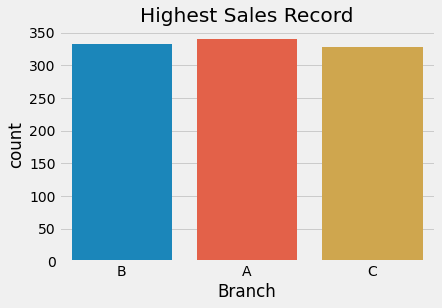

In [59]:
sns.countplot(x='Branch',data=df).set_title('Highest Sales Record')
# plt.savefig('Highest Sales Record.png')

###### Branch A has the highest sales.

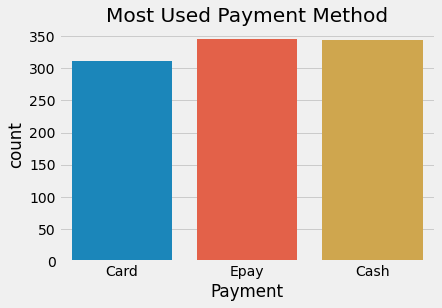

In [60]:
sns.countplot(x='Payment',data=df).set_title('Most Used Payment Method')
# plt.savefig('Most Used Payment Method.png')

###### Epay is slightly higher than Cash.

#### Explore a countplot for the `Payment` and `City` Column

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

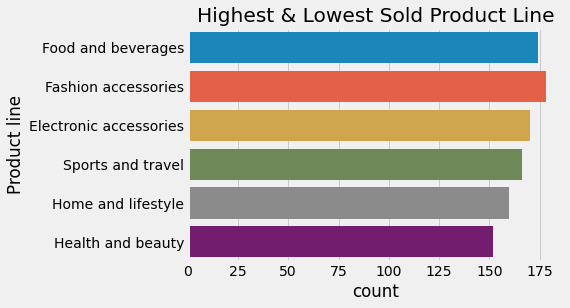

In [61]:
sns.countplot(y='Product line',data=df).set_title('Highest & Lowest Sold Product Line')
# plt.savefig('Highest & Lowest Sold Product Line.png')

- fashion accessories has the highest sold product line  
- health & beauty has the lowest sold product line

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

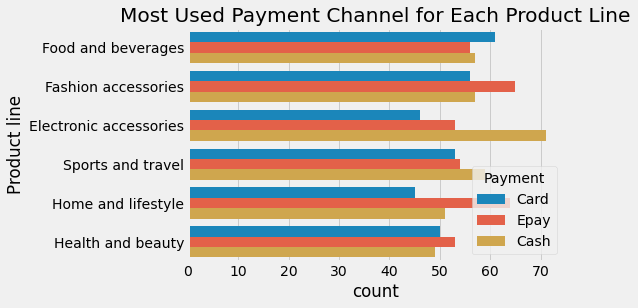

In [62]:
sns.countplot(y='Product line',hue='Payment',data=df).set_title('Most Used Payment Channel for Each Product Line')
# plt.savefig('Most Used Payment Channel for Each Product Line.png')

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

Text(0.5, 1.0, 'Payment Channel for Each Branch')

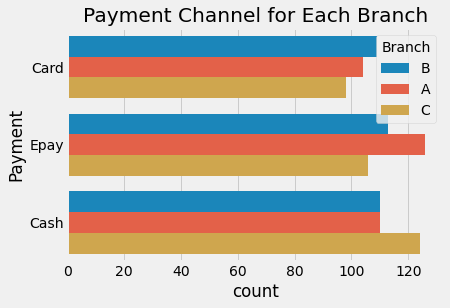

In [64]:
sns.countplot(y='Payment',hue='Branch',data=df).set_title('Payment Channel for Each Branch')
# plt.savefig('Payment Channel for Each Branch.png')

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

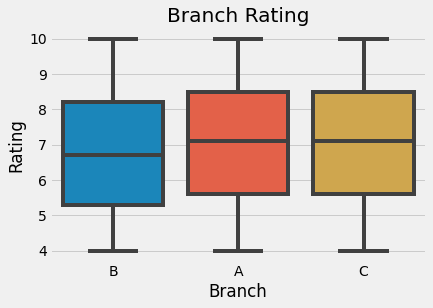

In [65]:
sns.boxplot(x='Branch',y='Rating',data=df).set_title('Branch Rating')
# plt.savefig('Branch Rating.png')

###### Branch B has the lowest rating

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

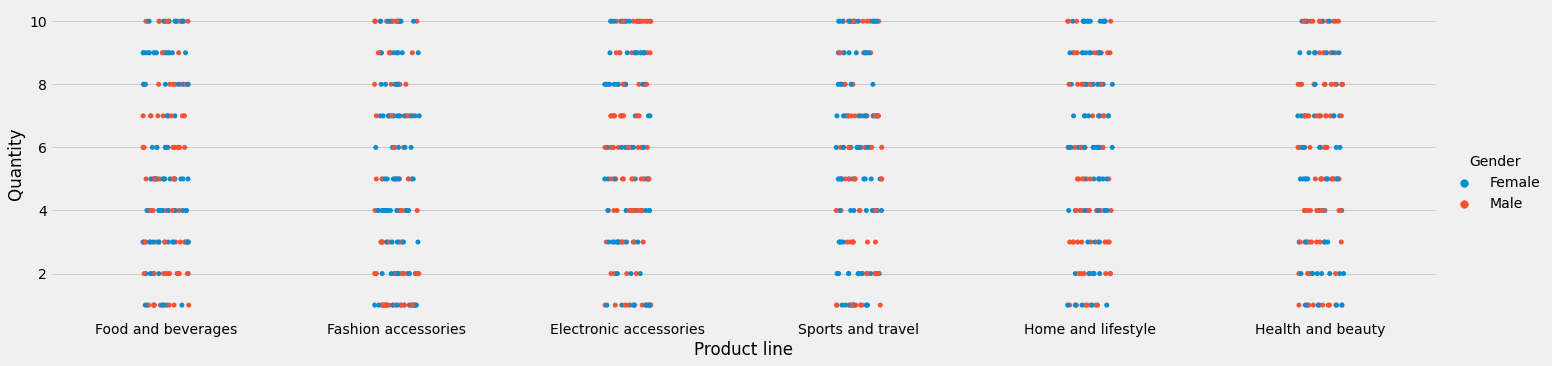

In [69]:
sns.catplot(x='Product line', y='Quantity', hue='Gender', data=df, aspect=4)
# plt.savefig('Product line per Quantity catplot.png')

- The highest quantity of Food and beverages products bought were by female customers.
- Female Customers also bought the highest quantity of Fashion accessories which makes sense.
- Male Customers bought the highest quantity of Electronic Accessories.
- Female customers bought the highest quantity of Sports and travel products.
- Female customers bought the highest quantity of Home and Lifestyle products.
- Male customers bought the highest quantity of Health and beauty products which is a huge surprise.

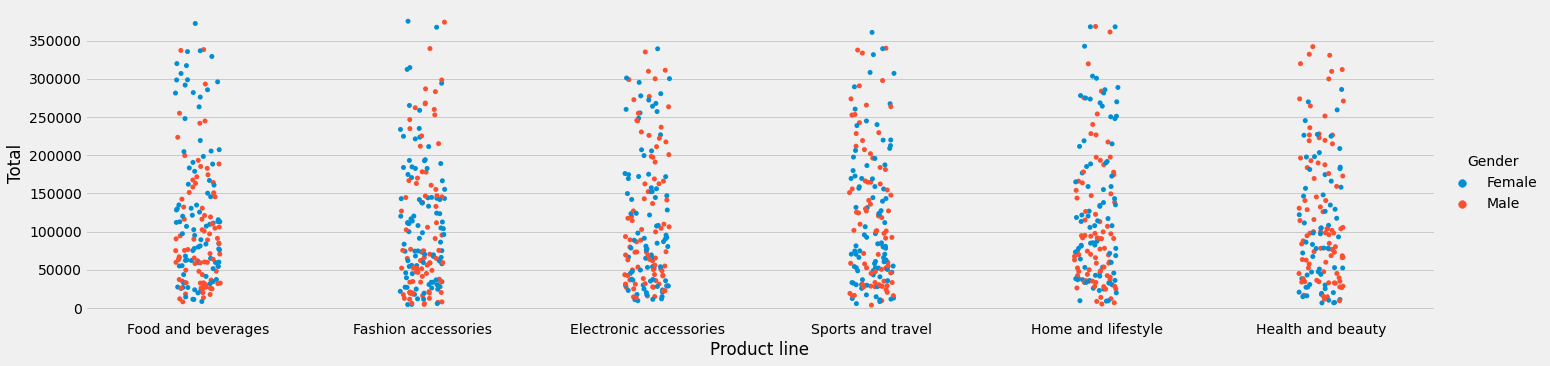

In [68]:
sns.catplot(x='Product line', y='Total', hue='Gender', data=df, aspect=4)
# plt.savefig('Product line per Total catplot.png')

- Male customers spent the most on Health and beauty products.
- Female customers the most on Home and lifestyle products.
- In general the total and quantity plots are similar i.e they have a high correlation.
- More expensive products across all product line were purchased the least.
- The products of the cheapest total prices were purchased more.

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

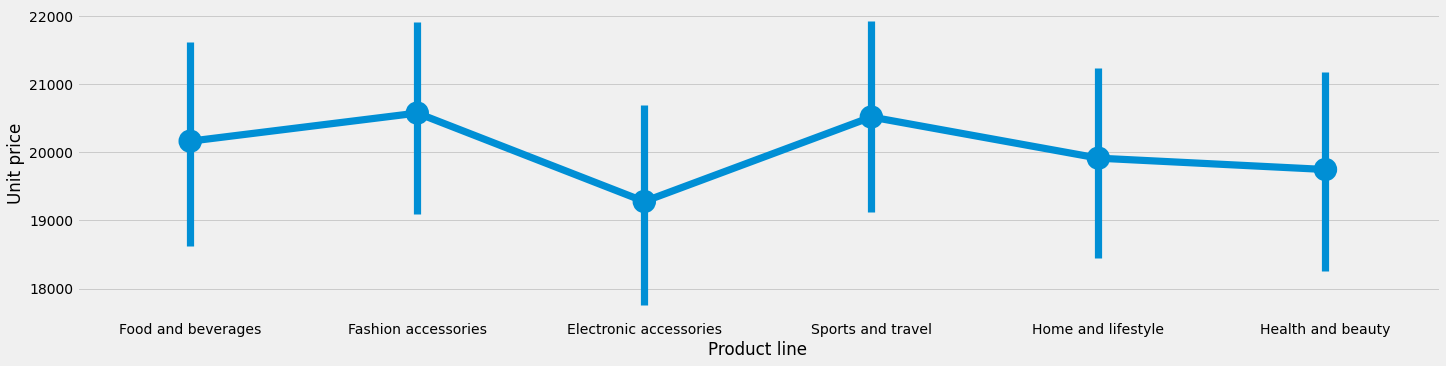

In [66]:
sns.catplot(x='Product line', y='Unit price', data=df, kind='point', aspect=4)
# plt.savefig('Product line per unit price.png')

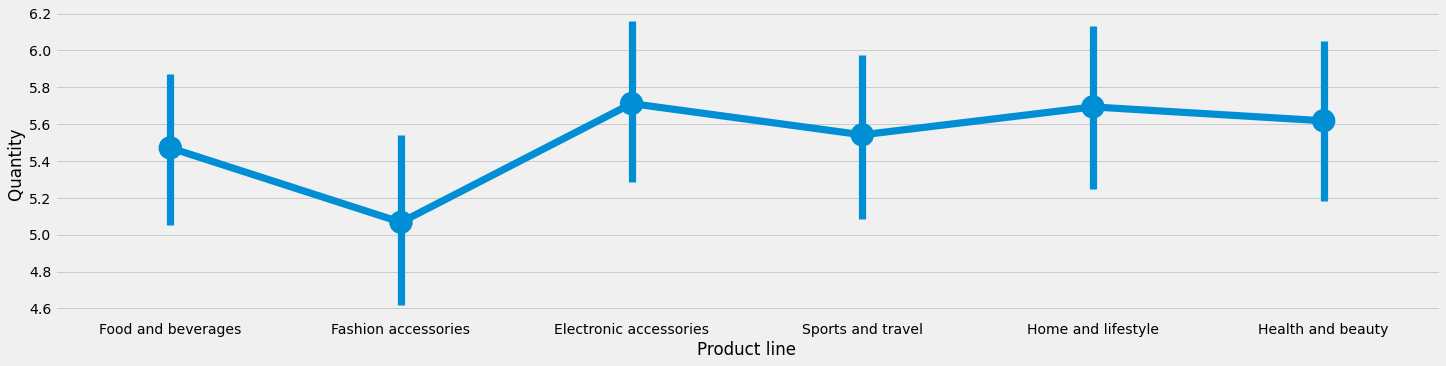

In [67]:
sns.catplot(x='Product line', y='Quantity', data=df, kind='point', aspect=4)
# plt.savefig('Product line per Quantity.png')

From the two catplot visualizations above, it can be deduced that unit price and quantity are inversely related i.e as price reduces, quantity increases and vice-versa

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 